# Musical Transcription using Gated Variational Autoencoders trained on Synthetic data
Oded Drori | Reichmann University, Herzliyah |
Final Course Project - Deep and Shallow Networks for Music & Audio

## Introduction

In this project I set out to demonstrate the principles and applications of Gated architecture Variational AutoEncoders (often abbreviated GVAE, GAE or Gated VAE) for musical learning. 
The original objective of the project was to test this architecture as a <b>"Vocal Harmonizer": converting an Audio/MIDI representation of a solo vocal performance to it's choir counterparts or harmonics</b>. As I could not find a readily adaptable netowrk with suitable data to use for this task, I changed this to a different objective: <b>Testing the performance of a GVAE network in musical transcription from Audio when trained using randomly synthesized data in place of musical recordings</b>. Additionally, I survey the considered datasets and future applications steming from this review.

## Gated Variatonal Autoencoders
Gated Variational Autoencoders (VAE's) are a modification of the VAE architecture, inserting domain knowledge in the form of weak supervision, in the hopes of increased disentanglement of the latent space. Like their ungated counterparts, Gated VAE's use all the whole network in the forward pass. In back propagation though, the part of the chain used will be different, depending on a prior partition of the data instances.
Put simply, data is partitioned into subsets based on prior knowledge, and partitions have different parts of the network associated with their weights. For the simplest case of two partitions, this allows the encoding and learning of relation between two distributions or subsets relating to the two classes.
Gated models have been demonstrated to outperform their ungated counterpart for [disentangling head-pose from facial expression](ieeexplore.ieee.org/abstract/document/9320221?casa_token=frSaYIsr_bsAAAAA:yOazvjwC4fTyKSaQndedgv0d4h3Ekjrf6f_NtpDBJg_jl8g7meLd_0frKS5KhPkzLNTgmF99ivA) in video, as well as being capable of [note interval estimation](https://arxiv.org/abs/1806.08236)  from audio, as well as [predicting bass progressions for existing compositions](mdpi.com/2076-3417/10/18/6627). In this project, I will demonstrate its use in [fill here]. For a more detailed explanation of the theory if gated VAE's, see [Vowels et. al. (2020)](ieeexplore.ieee.org/abstract/document/9320221?casa_token=frSaYIsr_bsAAAAA:yOazvjwC4fTyKSaQndedgv0d4h3Ekjrf6f_NtpDBJg_jl8g7meLd_0frKS5KhPkzLNTgmF99ivA)

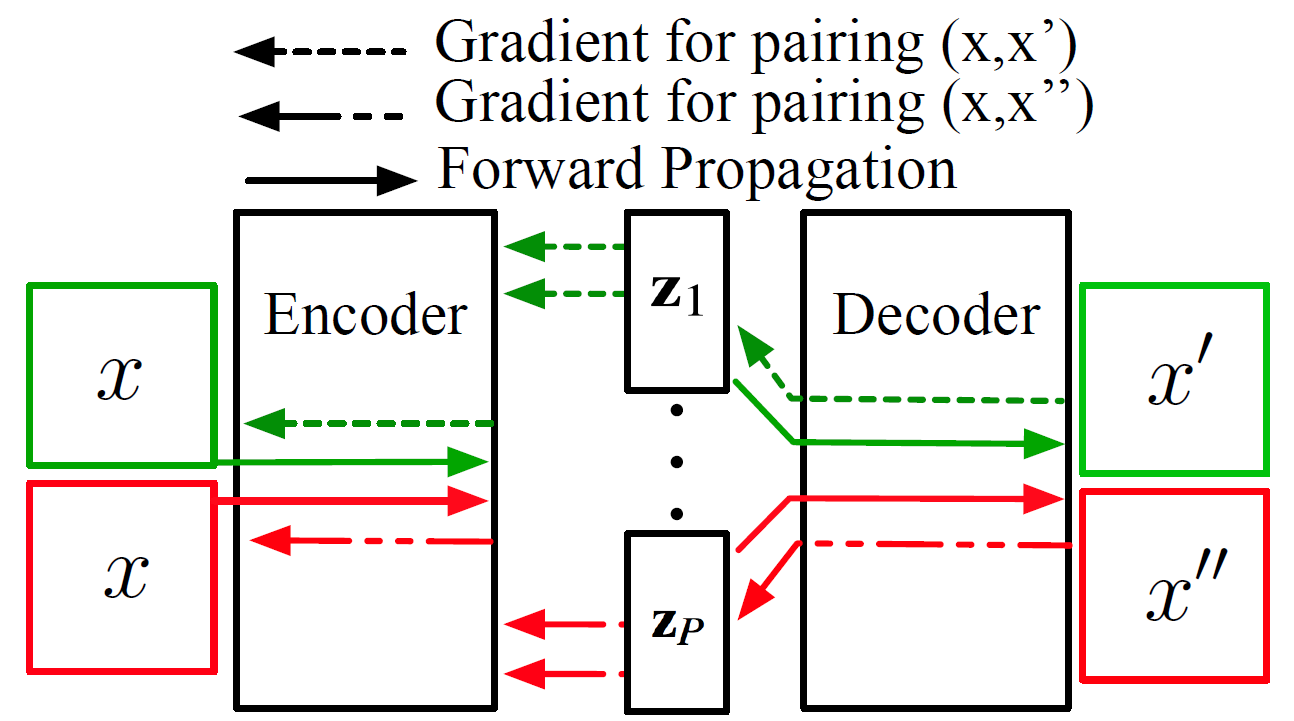
Gated VAE Training Principle - Forward propagation includes entire chain, backpropagation includes either partitition of it (dotted line). Figure adopted from [Vowels et. al. (2020)](https://ieeexplore.ieee.org/abstract/document/9320221?casa_token=frSaYIsr_bsAAAAA:yOazvjwC4fTyKSaQndedgv0d4h3Ekjrf6f_NtpDBJg_jl8g7meLd_0frKS5KhPkzLNTgmF99ivA) .

## Considered Models
During my search for a readily available network for adaptation, I've surveyed the linked works above. 

Though the work of [Vowels et. al. (2020)](https://ieeexplore.ieee.org/abstract/document/9320221?casa_token=frSaYIsr_bsAAAAA:yOazvjwC4fTyKSaQndedgv0d4h3Ekjrf6f_NtpDBJg_jl8g7meLd_0frKS5KhPkzLNTgmF99ivA) lay the foundation for gated VAE's, I couldn't find an implementation of it in code and it would be expected to only roughly resemble the needs of my method (considerable transformation would be needed to have the netowrk properly train on Audio rather than Video data).

[BassNet](mdpi.com/2076-3417/10/18/6627) was an ideal candidate as it functionally performed an equivalent task, predicting bass notation based on audio rather than vocal notation. The network used a robust Gated Convolutional sub-block to infer musical notation from the incoming audio, and applied it's encoding/decoding notation rather directly on audio, making it more suitable for adaptation. However, the code is not publically available and so I had to resort to a more modest model developed by the same team - the model found at [cgae-invar](https://github.com/SonyCSLParis/cgae-invar), titled, "Convolutional Gated Autoencoder for Learning Transposition-invariant Features from Audio", is an implementation of the algorithm described in the afformentioned [Learning transposition-invariant interval features from symbolic music and audio](mdpi.com/2076-3417/10/18/6627). This model is trained on audio data, and uses the Gated architecture, applied on an internal CQT transformation, to convert it to musical notation. 

<b>Illustration of the BassNet Model for bass prediction from Audio. Note the seperation between CQT audio-to-notation sub blocks at the bottom, and the gated autoencoder / decoder at the top  </b>
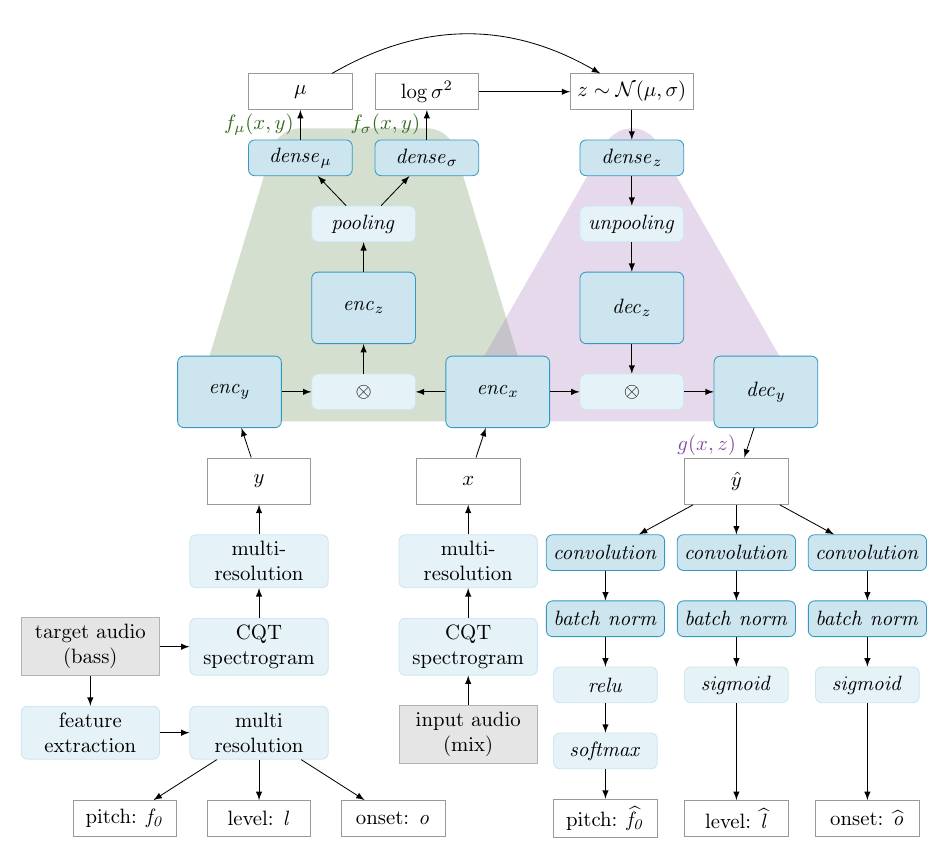

## Datasets Considered
The ideal dataset for this project would be large, musically diverse, with detailed notataion or seperate, synced recording for multiple voices. Two datasets were considered before deciding on independently generating one. A detailed description of each dataset is given in <i>Appendixes 1,2</i> at the end of the notebook, and links to their original publication are given as well.

### DALI Dataset
[DALI (a large Dataset of synchronised Audio, LyrIcs and vocal notes)](https://transactions.ismir.net/articles/10.5334/tismir.30/) is a 5300-song database, with detailed lyrical and tonal annotation. Each entry detailes, for each note sung:
* Fundamental frequency, start and end times
* Word, sentence, paragraph the note belongs to
* Additional metadata such as song title, genre
* Link to audio source on Youtube and an interface for downloading the audio

DALI is an [open dataset](https://github.com/gabolsgabs/DALI) (for academic use, upon authorization request) making it a could candidate, however the lack of multivoiced data made it unsuitable for the task of predicting voices from each other.

### Bach Chorales Dataset
The [Bach Chorales Dataset](https://archive.ics.uci.edu/ml/datasets/Bach+Chorales) is a transcribed (musically notated) database taken from 100 different Bach Chorales. Although four voices were supplied to the author, currently the dataset includes on the Soprano line for each chorale.
Each instance contains the following data:
* start-time (in 1/16th notes)
* pitch (in MIDI encoding)
* duration (in 1/16th notes)
* key signature (index marking sharps/flats)
* time signature (in 1/16th notes)
* fermata data (true/false)

This dataset seemed very suitable for the original objective of the project, given its 100 instances (which can be further augmented) and readily discretized pitch/timing data. However, the lack of multivoiced data was crucial for the goal of voice prediction. Most importantly, being a transcribed dataset with no audio, it could not be used with the selected network without any synthesis to convert it to audio.

### Dataset and Model used : Convolutional Gated VAE & Locally Generated Chorded Riffs
For the sake of limiting the scope of the project, I defined a new objective, and chose a suitable model and dataset to meet it. Using the <i>cgae-invar</i> as described above, I chose to <b>test the performance of the network on synthetic data</b>. This architecture allows for several tunable parameters (see "Network Training" below). Both datasets surveyed above were found unsuitable, so I resorted to generate a dataset myself.

Using my DAW (<i>FL Studio 20.9.2</i>), I was able to utilize FL-Studio's "Riff Machine" and built in "3xOSC": synthesizer (playing as a single-voice sinewave) to generate piano roll sequences of different chords. The Riff Machine is essentially a complex note generator with various tunable modules such as Progression, Chords, Arppegiator, Groove and others, and enables rapid generation of piano roll sequences. Using built in randomization can yield a sequence of designated length at the press of a button.

#### The generated dataset includes 72 recordings each:
* 64 bars long, 120BPM
* 16 bit, stereo, .wav format, 44100 Hz sampling frequency
* Containing randomly generated notes or chords, shifted to different octaves
* Total dataset size roughly 1.5 GB

#### <b>FL Studio Riff Machine interface with different modules & parameters for generation </b>
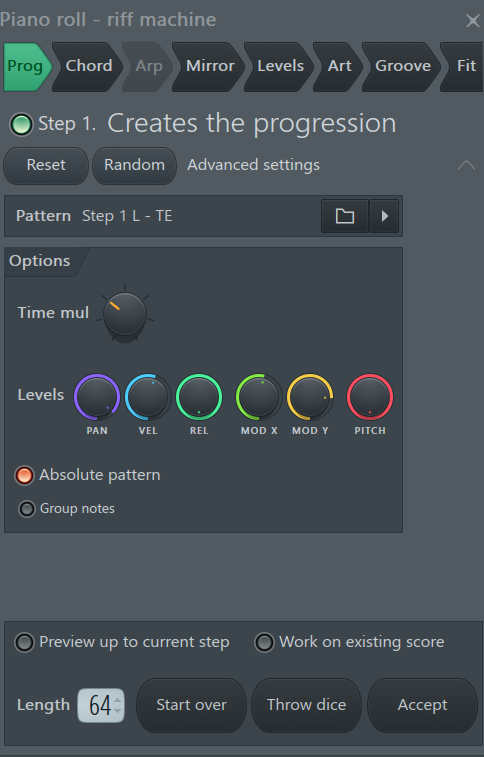

#### <b>Example of piano-roll notaion for a data instance (sticks at the bottom represent note velocities)</b>
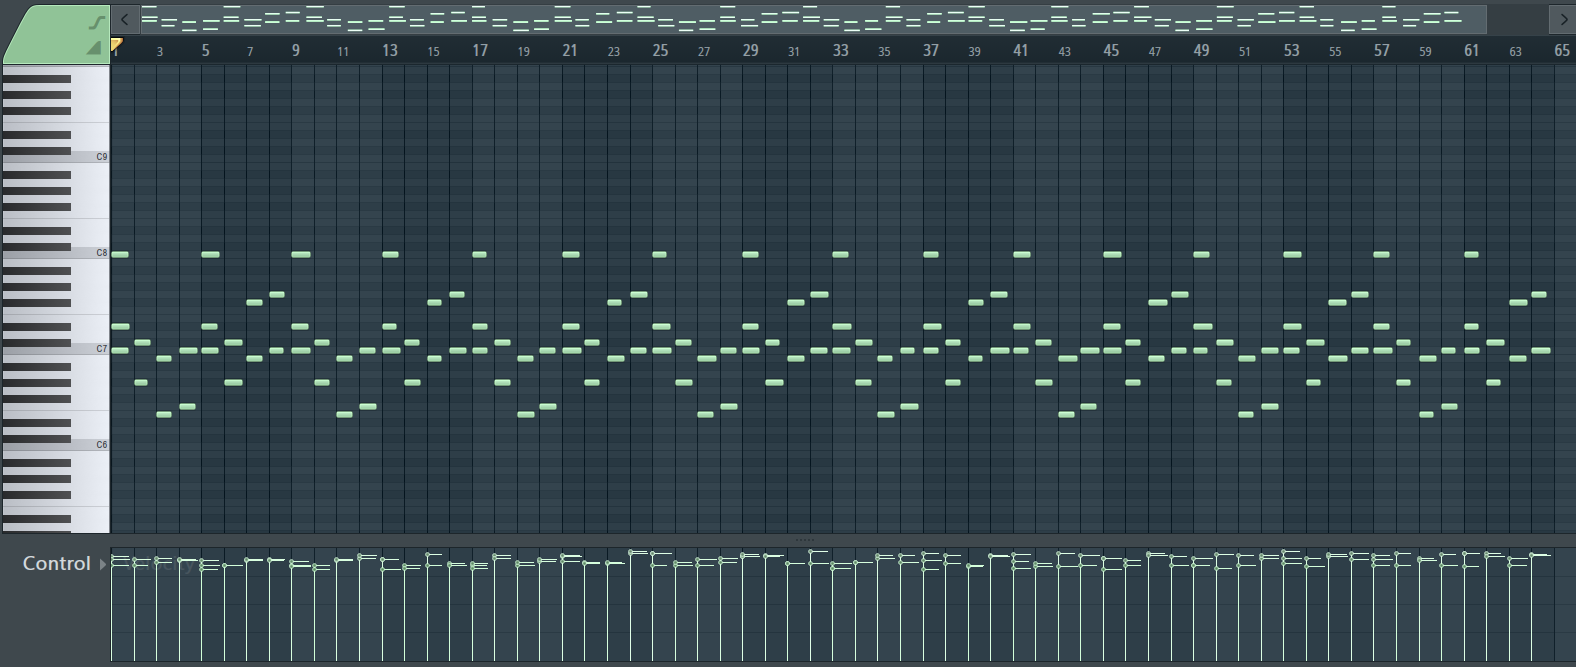

## Network Training
The model was trained on the generated dataset using the default parameters:
- width of input window - default: 9
- size of factor layer - 256
- size of mapping layers - 128 by 64
- input batch size for training - 10
- number of epochs to train - 501
- learning rate - 0.001
- sparsity regularization on top-most mapping layer - 4e-6
- weight regularization on the input filters - 0
- length of one instance in batch - 1024
- number of frequency bins for CQT - 120
- number of frequency bins per octave for CQT - 24)
- minimum frequency for CQT - 65.4
- hop length for CQT - 448

In order for the model to run, I only had to make an alteration to what I suspect is an unintented bug in the original code: 
- in CQT.process_file line 273, rather than ignore files that cannot be sliced precisly based on the block size, ignore only the last block of the file
- Additionally, the entire code for the train.py and convert.py needed to be inserted into an <i>if __name__ == "__main__"</i> statement to avoid hanging due to run_freeze() clashes with Windows.

model training took roughly 6 hours.

## Results & Discussion
The output model was used to convert a small set of .wav files to their lower dimension CQT representation.


## Future Work
COMPLETE PICTURE WITH MUSICAL DATA TRAINING
Based on the architecture of gated VAE's, it is possible to extend the model presented here to match e.g. quartets instead of pairs of voices. A four-partition network could be able to reproduce multiple voices simulatenously, paving the way to rich harmonization.

## Append. 1  - DALI Dataset Exploration by Code

### imports / setup / loading

In [6]:
import numpy as np
import DALI as dali_code
import os
import pandas as pd
from pprint import pprint

dali_data_path = r'C:\git\Datasets\DALI_dataset'
dali_data = dali_code.get_the_DALI_dataset(dali_data_path, skip=[], keep=[])
dali_info_path = os.path.join(dali_data_path, 'info\DALI_DATA_INFO.gz')
dali_info = dali_code.get_info(dali_info_path)
dali_column_names= dali_info[0]
dali_dimensions = dali_info.shape
num_entries = dali_dimensions[0]-1
dali_info_example = dali_info[1]

### Overview

In [8]:
print(f"dali_info describes the DALI dataset. There are {num_entries} entries in the dataset\n\n")
print(f"each entry has the following describers : \n{dali_column_names}\n\n")
print(f"an example entry: \n{dali_info_example}\n\n")

dali_info describes the DALI dataset. There are 5358 entries in the dataset


each entry has the following describers : 
['DALI_ID' 'NAME' 'YOUTUBE' 'WORKING']


an example entry: 
['e186227bb7474fa5a7738c9108f11972' 'Staind-Tangled_Up_In_You'
 'NXG-ayocugI' 'True']




### Sample and info

In [12]:
example_id = 'e186227bb7474fa5a7738c9108f11972'
print(f"The DALI dataset is implemented as a nested dictionary. Each key is an ID in the dataset") 
example_entry = dali_data[example_id].__dict__.keys()
print(f"Every entry has 3 attributes (keys): \n{list(example_entry)}\n\n") 
print(f"an example of an info entry:")
pprint(dali_data[example_id].info)

The DALI dataset is implemented as a nested dictionary. Each key is an ID in the dataset
Every entry has 3 attributes (keys): 
['info', 'annotations', 'errors']


an example of an info entry:
{'artist': 'Staind',
 'audio': {'path': 'None', 'url': 'NXG-ayocugI', 'working': True},
 'dataset_version': 1.0,
 'ground-truth': False,
 'id': 'e186227bb7474fa5a7738c9108f11972',
 'metadata': {'album': 'The Illusion Of Progress',
              'cover': 'https://cdns-images.dzcdn.net/images/cover/6f9751b94bc0ea996d82d82f0715f3ce/1000x1000-000000-80-0-0.jpg',
              'genres': ['Rock'],
              'language': 'english',
              'release_date': '2008'},
 'scores': {'NCC': 0.8428142553935238, 'manual': 0.0},
 'title': 'Tangled Up In You'}


### Annotations

In [23]:
print("'annotations' holds the following keys: ", list(dali_data[example_id].annotations.keys()))

example_type = dali_data[example_id].annotations["type"]
annot_example = dali_data[example_id].annotations["annot"]
annot_param_example = dali_data[example_id].annotations["annot_param"]

print(f"\t example of a 'type' field: {example_type}")
print(f"\t example of a 'annot_param' field : {annot_param_example}\n")

note_example = annot_example['notes'][0]
line_example = annot_example['lines'][0]
word_example = annot_example['words'][0]
paragraph_example = annot_example['paragraphs'][0]
print(f"\t An 'annot' instance contains the following fields: {list(annot_example.keys())} \n\n")
print(f"\t\t'notes' is a list of dicts. An example of one such dict : \n\t\t {note_example}\n\n")
print(f"'\t\tlines' is a list of dicts. An example of one such dict : \n\t\t {line_example}\n\n")
print(f"\t\t'words' is a list of dicts. An example of one such dict : \n\t\t {word_example}\n\n")
print(f"\t\t'paragraphs' is a list of dicts. An example of one such dict : \n\t\t {paragraph_example}\n\n")

'annotations' holds the following keys:  ['type', 'annot', 'annot_param']
	 example of a 'type' field: horizontal
	 example of a 'annot_param' field : {'fr': 1600.0000000000002, 'offset': 29.542}

	 An 'annot' instance contains the following fields: ['notes', 'lines', 'words', 'paragraphs'] 


		'notes' is a list of dicts. An example of one such dict : 
		 {'text': "you're", 'freq': [391.99543598174927, 391.99543598174927], 'time': [29.542, 29.8045], 'index': 0}


'		lines' is a list of dicts. An example of one such dict : 
		 {'text': "you're my world,", 'freq': [391.99543598174927, 659.2551138257398], 'time': [29.542, 31.2295], 'index': 0}


		'words' is a list of dicts. An example of one such dict : 
		 {'text': "you're", 'freq': [391.99543598174927, 391.99543598174927], 'time': [29.542, 29.8045], 'index': 0}


		'paragraphs' is a list of dicts. An example of one such dict : 
		 {'text': "you're my world, the shelter from the rain you're the pills, that take away my pain you're the 

## Append. 2  - Bach Chorales Exploration by Code

### imports / setup / loading

In [78]:
from pyparsing import OneOrMore, nestedExpr
from texttable import Texttable
import re
from io import StringIO

file_path = r'C:\git\Datasets\Bach_Chorales\chorales.lisp'

with open(file_path) as f:
    input_data = f.read()

### Tabulation and example

In [79]:
data = OneOrMore(nestedExpr()).parseString(input_data)
tab = Texttable()
for row in data.asList()[0][1:]:
    row = dict(row)
    tab.header(row.keys())
    tab.add_row(row.values())
print (tab.draw())

+-----+-------+-----+--------+---------+---------+
| st  | pitch | dur | keysig | timesig | fermata |
+=====+=======+=====+========+=========+=========+
| 8   | 67    | 4   | 1      | 12      | 0       |
+-----+-------+-----+--------+---------+---------+
| 12  | 67    | 8   | 1      | 12      | 0       |
+-----+-------+-----+--------+---------+---------+
| 20  | 74    | 4   | 1      | 12      | 0       |
+-----+-------+-----+--------+---------+---------+
| 24  | 71    | 6   | 1      | 12      | 0       |
+-----+-------+-----+--------+---------+---------+
| 30  | 69    | 2   | 1      | 12      | 0       |
+-----+-------+-----+--------+---------+---------+
| 32  | 67    | 4   | 1      | 12      | 0       |
+-----+-------+-----+--------+---------+---------+
| 36  | 67    | 6   | 1      | 12      | 0       |
+-----+-------+-----+--------+---------+---------+
| 42  | 69    | 2   | 1      | 12      | 0       |
+-----+-------+-----+--------+---------+---------+
| 44  | 71    | 4   | 1      | 